INPUT


In [1]:
# Package
import pandas as pd
import numpy as np
import csv
import matplotlib as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score

In [2]:
# Read csv file
df = pd.read_csv("car_evaluation.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
# Change name of column
df.columns = ["buying price", "maintenance cost", "number of doors", "number of persons", "lug_boot", "safety", "decision"]

In [5]:
# Check type of df column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Change value of target column
df["decision"].replace({"unacc": "No", "acc": "Yes", "vgood": "Yes", "good": "Yes"}, inplace=True)
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,No
1,vhigh,vhigh,2,2,small,med,No
2,vhigh,vhigh,2,2,small,high,No
3,vhigh,vhigh,2,2,med,low,No
4,vhigh,vhigh,2,2,med,med,No
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,Yes
1724,low,low,5more,more,med,high,Yes
1725,low,low,5more,more,big,low,No
1726,low,low,5more,more,big,med,Yes


In [7]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,No
1,vhigh,vhigh,2,2,small,med,No
2,vhigh,vhigh,2,2,small,high,No
3,vhigh,vhigh,2,2,med,low,No
4,vhigh,vhigh,2,2,med,med,No
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,Yes
1724,low,low,5more,more,med,high,Yes
1725,low,low,5more,more,big,low,No
1726,low,low,5more,more,big,med,Yes


TRANSFORM DATA



In [8]:
# Check unique value of each column:
object_columns = (df
                  .columns)
for column in object_columns:
    print("{} has {} unique values."
          .format(column, 
                  df[column]
                  .unique()))

buying price has ['vhigh' 'high' 'med' 'low'] unique values.
maintenance cost has ['vhigh' 'high' 'med' 'low'] unique values.
number of doors has ['2' '3' '4' '5more'] unique values.
number of persons has ['2' '4' 'more'] unique values.
lug_boot has ['small' 'med' 'big'] unique values.
safety has ['low' 'med' 'high'] unique values.
decision has ['No' 'Yes'] unique values.


In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [10]:
# Transform category data to numeric data
for column in df:
   df[column] = label_encoder.fit_transform(df[column])
    


In [11]:
# Check unique value after transforming
object_columns = (df
                  .columns)
for column in object_columns:
    print("{} has {} unique values."
          .format(column, 
                  df[column]
                  .unique()))

buying price has [3 0 2 1] unique values.
maintenance cost has [3 0 2 1] unique values.
number of doors has [0 1 2 3] unique values.
number of persons has [0 1 2] unique values.
lug_boot has [2 1 0] unique values.
safety has [1 2 0] unique values.
decision has [0 1] unique values.


In [12]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,3,3,0,0,2,1,0
1,3,3,0,0,2,2,0
2,3,3,0,0,2,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,1
1725,1,1,3,2,0,1,0
1726,1,1,3,2,0,2,1


In [13]:
# Check balance class of target column
c = df['decision'].value_counts(dropna=False)
p = df['decision'].value_counts(dropna=False, normalize=True).mul(100).round(3)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
0,1210,70.023
1,518,29.977


In [14]:
df

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,3,3,0,0,2,1,0
1,3,3,0,0,2,2,0
2,3,3,0,0,2,0,0
3,3,3,0,0,1,1,0
4,3,3,0,0,1,2,0
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,1
1725,1,1,3,2,0,1,0
1726,1,1,3,2,0,2,1


CREATE A HOLD_OUT TO TEST AFTER TRAINNING

In [15]:
df_remain = df.sample(frac = 0.25, random_state=1)

In [16]:
df_final = df.drop(df_remain.index)
# Note: Rows of df_remain - 432
#       Rows of df_final - 1296

FUNCTION

In [28]:
# Function to calculate distance
# Calculate distance between two points
def minkowski_distance(a, b, p=p):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [29]:
def knn_prediction(X_test, X_train, y_train, y_test, k, p=p):
    # Create a blank list to append the result of prediction
    y_test_prediction = []
    # Iterate through index,value per row of test data
    for index,test_point in X_test.iterrows():
        distances = []
        # Iterate through index,value per row of train data
        for index,train_point in X_train.iterrows():
            distance = minkowski_distance(test_point,train_point, p=p)
            distances.append(distance)

        # Sort distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)

        # Sort value of distances and consider the k closet points:
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Get the frequency by unique value of label of y_train
        counter = y_train[df_nn.index].value_counts()

        # Get most common label of all the nearest neighbors
        prediction = counter.index[0]
        
        # Append prediction to output list
        y_test_prediction.append(prediction)
    return y_test_prediction

TRAINING MODEL



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Separate X and y data

X = df_final.drop('decision', axis=1)
y = df_final.decision

In [32]:
# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

In [33]:
X_train

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety
1251,2,1,2,1,2,1
1367,1,3,2,1,0,0
1288,2,1,3,2,2,2
1404,1,0,0,0,2,1
548,0,0,0,0,0,0
...,...,...,...,...,...,...
946,2,3,3,0,2,2
1200,2,1,0,1,1,1
1461,1,0,2,0,1,1
319,3,2,3,2,1,2


In [34]:
def knn_prediction(X_train,X_test,y_train,y_test,k,p=p):
    # Create a blank list to append the result of prediction
    y_test_prediction = []
    # Iterate through index,value per row of test data
    for index,test_point in X_test.iterrows():
        distances = []
        # Iterate through index,value per row of train data
        for index,train_point in X_train.iterrows():
            distance = minkowski_distance(test_point,train_point, p=p)
            distances.append(distance)

        # Sort distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                    index=y_train.index)

        # Sort value of distances and consider the k closet points:
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Get the frequency by unique value of label of y_train
        counter = y_train[df_nn.index].value_counts()

        # Get most common label of all the nearest neighbors
        prediction = counter.index[0]
            
        # Append prediction to output list
        y_test_prediction.append(prediction)
    return y_test_prediction

In [35]:
# Apply knn prediction function
y_test_prediction = knn_prediction(X_train, X_test, y_train, y_test, k=5, p=1)

In [28]:
# Get test accuracy score for data not scaler

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_prediction))

0.9290123456790124


In [29]:
array = np.array(y_test_prediction)

In [30]:
unique, counts = np.unique(array, return_counts=True)

In [31]:
result = np.column_stack((unique, counts)) 
print (result)

[[  0 240]
 [  1  84]]


In [32]:
# Confusion Matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_prediction)

In [34]:
confusion_matrix

array([[219,   2],
       [ 21,  82]])

In [35]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

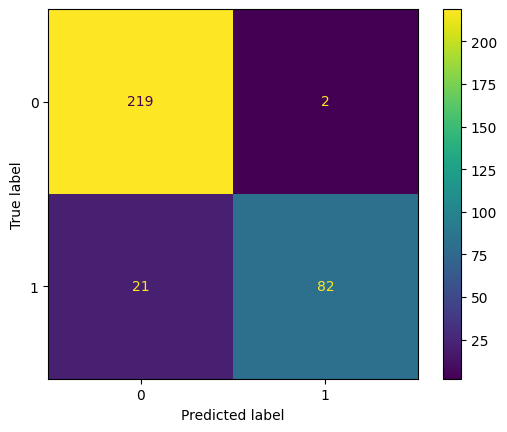

In [36]:
cm_display.plot()
plt.show()

CHECK OVERFITTING

In [37]:
df_remain_x = df_remain.drop('decision', axis=1)
df_remain_y = df_remain.decision

In [38]:
y_hat_test_ver2 = knn_prediction(X_train, df_remain_x, y_train, df_remain_y, k=5, p=1)

In [39]:
# Get test accuracy score

from sklearn.metrics import accuracy_score

print(accuracy_score(df_remain_y, y_hat_test_ver2))

0.9328703703703703


OPTIMIZE K

In [40]:
import time

In [225]:
# Obtain accuracy score varying k from 1 to 99

accuracies = []

for k in range(1,30):
    start_time = time.time()
    y_test_prediction = knn_prediction(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_test_prediction))
    print("--- %s seconds ---" % round(time.time() - start_time, 5))



--- 7.04571 seconds ---
--- 6.98295 seconds ---
--- 7.0197 seconds ---
--- 6.98061 seconds ---
--- 7.03837 seconds ---
--- 6.97887 seconds ---
--- 6.97977 seconds ---
--- 7.00918 seconds ---
--- 6.99265 seconds ---
--- 6.98013 seconds ---
--- 7.01101 seconds ---
--- 6.99301 seconds ---
--- 6.98007 seconds ---
--- 6.99484 seconds ---
--- 6.98522 seconds ---
--- 6.99477 seconds ---
--- 6.98632 seconds ---
--- 6.99163 seconds ---
--- 6.98373 seconds ---
--- 6.99882 seconds ---
--- 7.0836 seconds ---
--- 6.99368 seconds ---
--- 7.02761 seconds ---
--- 6.98049 seconds ---
--- 6.98778 seconds ---
--- 7.02635 seconds ---
--- 7.06951 seconds ---
--- 7.00885 seconds ---
--- 6.99572 seconds ---


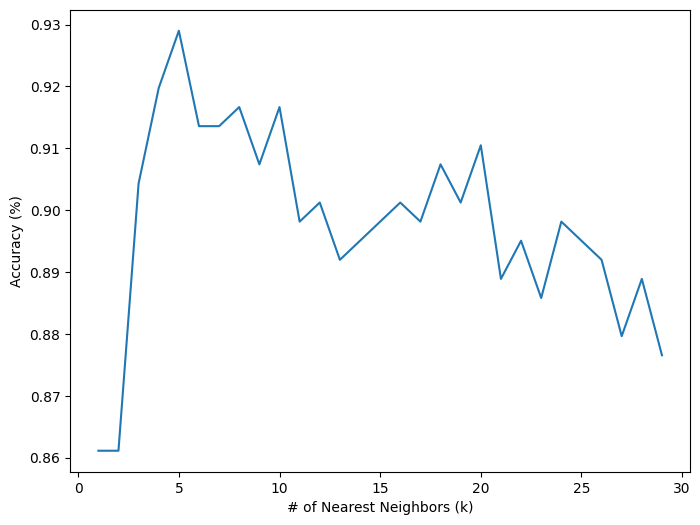

In [226]:
# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,30), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');